Данный скрипт позволяет сгладить результаты Inverse Kinemaics (согласно инструкциям и моему опыту, IK периодически выдаёт файлы со скачками, которые рекомендуется сглаживать)

In [ ]:
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [2]:
#Все обобщённые координаты
coordinates = ['pelvis_rotation', 'pelvis_tilt', 'pelvis_list', 'pelvis_tx', 'pelvis_ty', 'pelvis_tz', 'Abs_FE', 'Abs_LB', 
               'Abs_AR', 'L5_S1_FE', 'L5_S1_LB', 'L5_S1_AR', 'L4_L5_FE', 'L4_L5_LB', 'L4_L5_AR', 'L3_L4_FE', 'L3_L4_LB', 
               'L3_L4_AR', 'L2_L3_FE', 'L2_L3_LB', 'L2_L3_AR', 'L1_L2_FE', 'L1_L2_LB', 'L1_L2_AR', 'T12_L1_FE', 'T12_L1_LB', 
               'T12_L1_AR', 'T11_T12_FE', 'T11_T12_LB', 'T11_T12_AR', 'T10_T11_FE', 'T10_T11_LB', 'T10_T11_AR', 'T9_T10_FE',
               'T9_T10_LB', 'T9_T10_AR', 'T8_T9_FE', 'T8_T9_LB', 'T8_T9_AR', 'T7_T8_FE', 'T7_T8_LB', 'T7_T8_AR', 'T6_T7_FE',
               'T6_T7_LB', 'T6_T7_AR', 'T5_T6_FE', 'T5_T6_LB', 'T5_T6_AR', 'T4_T5_FE', 'T4_T5_LB', 'T4_T5_AR', 'T3_T4_FE',
               'T3_T4_LB', 'T3_T4_AR', 'T2_T3_FE', 'T2_T3_LB', 'T2_T3_AR', 'T1_T2_FE', 'T1_T2_LB', 'T1_T2_AR', 'pitch2', 
               'roll2', 'yaw2', 'aux7jnt_r3', 'aux7jnt_r1', 'aux7jnt_r2', 'aux6jnt_r3', 'aux6jnt_r1', 'aux6jnt_r2', 
               'aux5jnt_r3', 'aux5jnt_r1', 'aux5jnt_r2', 'aux4jnt_r3', 'aux4jnt_r1', 'aux4jnt_r2', 'aux3jnt_r3', 'aux3jnt_r1', 
               'aux3jnt_r2', 'pitch1', 'roll1', 'yaw1', 'aux1jnt_r3', 'aux1jnt_r1', 'aux1jnt_r2', 'T12_r12R_X', 'T12_r12R_Y', 
               'T12_r12R_Z', 'T11_r11R_X', 'T11_r11R_Y', 'T11_r11R_Z', 'T10_r10R_X', 'T10_r10R_Y', 'T10_r10R_Z', 'T9_r9R_X',
               'T9_r9R_Y', 'T9_r9R_Z', 'T8_r8R_X', 'T8_r8R_Y', 'T8_r8R_Z', 'T7_r7R_X', 'T7_r7R_Y', 'T7_r7R_Z', 'T6_r6R_X', 
               'T6_r6R_Y', 'T6_r6R_Z', 'T5_r5R_X', 'T5_r5R_Y', 'T5_r5R_Z', 'T4_r4R_X', 'T4_r4R_Y', 'T4_r4R_Z', 'T3_r3R_X', 
               'T3_r3R_Y', 'T3_r3R_Z', 'T2_r2R_X', 'T2_r2R_Y', 'T2_r2R_Z', 'T1_r1R_X', 'T1_r1R_Y', 'T1_r1R_Z', 'T12_r12L_X', 
               'T12_r12L_Y', 'T12_r12L_Z', 'T11_r11L_X', 'T11_r11L_Y', 'T11_r11L_Z', 'T10_r10L_X', 'T10_r10L_Y', 'T10_r10L_Z', 
               'T9_r9L_X', 'T9_r9L_Y', 'T9_r9L_Z', 'T8_r8L_X', 'T8_r8L_Y', 'T8_r8L_Z', 'T7_r7L_X', 'T7_r7L_Y', 'T7_r7L_Z', 
               'T6_r6L_X', 'T6_r6L_Y', 'T6_r6L_Z', 'T5_r5L_X', 'T5_r5L_Y', 'T5_r5L_Z', 'T4_r4L_X', 'T4_r4L_Y', 'T4_r4L_Z', 
               'T3_r3L_X', 'T3_r3L_Y', 'T3_r3L_Z', 'T2_r2L_X', 'T2_r2L_Y', 'T2_r2L_Z', 'T1_r1L_X', 'T1_r1L_Y', 'T1_r1L_Z', 
               'SternumRotZ', 'SternumRotX', 'SternumRotY', 'SternumX', 'SternumY', 'SternumZ', 'clav_prot_R', 'clav_elev_R', 
               'scap_abdR', 'scap_elevR', 'scap_upw_rotR', 'scap_wingR', 'shoulder_elv_r', 'shoulder_rot_r', 'elv_angle_r',
               'elbow_flexion_r', 'pro_sup_r', 'wrist_dev_r', 'wrist_flex_r', 'clav_prot_L', 'clav_elev_L', 'scap_abdL', 
               'scap_elevL', 'scap_upw_rotL', 'scap_wingL', 'shoulder_elv_l', 'shoulder_rot_l', 'elv_angle_l', 
               'elbow_flexion_l', 'pro_sup_l', 'wrist_dev_l', 'wrist_flex_l', 'hip_flexion_r', 'hip_adduction_r', 
               'hip_rotation_r', 'knee_angle_r', 'ankle_angle_r', 'hip_flexion_l', 'hip_adduction_l', 'hip_rotation_l',
               'knee_angle_l', 'ankle_angle_l']
#Хранит названия колонок в списке
cols = []
#Колонки, соответствующие условно неподвижным маркерам
stablecols = []
#Хранит названия колонок в строке
csvcols = ''
for i in coordinates:
    cols.append(i)
csvcols += cols[-3] + '\t' + cols[-2] + '\t' + cols[-1] + '\t'

In [3]:
files = ['1_right.mot', '1_left.mot', '2_forward.mot', '2_backward.mot', '3_right.mot','3_left.mot', '4_right.mot','4_left.mot',
        '5_clw.mot', '5_counterclw.mot', '7_backward.mot']
files = ['7_forward.mot', '8.mot', '9_right.mot', '9_combined.mot',
        '10_forward.mot', '11_right.mot', '12.mot', '14.mot']
#Файлы, подлежащие сглаживанию
files = ['1_right.mot']
#Здесь можно задать префикс для всех файлов
for i in range(len(files)):
    files[i] = 'IK_new\\together\\' + files[i]
    #files[i] = 'IK\\2\\' + files[i]
for file in files:
    #Data from original file
    datalines = []
    with open (file, 'r') as fp:
        datalines = fp.readlines()
        infolines = datalines[0:11]
        datalines = datalines[11:-1]
    textdatalines = ''
    textinfodatalines = ''
    for i in datalines:
        textdatalines += i + '\n'
    #df хранит данные оригинального файла. портить нельзя
    df = pd.read_csv(StringIO(textdatalines), sep = '\t', names = ['Time'] + cols)
    #версия сглаживания на предвдущем шаге
    df1 = df.copy()
    #версия сглаживания на текущем шаге
    df2 = df1.copy()
   
    for i in range(20):
        for j in cols:
            df2[j].values[1] = (df1[j].values[0] + df1[j].values[2]) / 2    
            for k in range(2, df.shape[0]-2):
                df2[j].values[k] = (df1[j].values[k-1] + df1[j].values[k] + df1[j].values[k+1]) / 3
            
            df2[j].values[-2] = (df1[j].values[-3] + df1[j].values[-1]) / 2
        df1 = df2.copy()
    #Запись данных в файл
    newinfolines = infolines.copy()
    newtextlines = df2.to_csv(sep = '\t', header=False, index = False)
    newtextlines = ''.join(newinfolines) + newtextlines
    with open (file[0:-4] + '_smoothed.mot', 'w+') as fp:
        fp.write(newtextlines)

In [5]:
#Список коордиант, графики которых было бы интересно увидеть ниже
useful_coords = ['pelvis_rotation', 'pelvis_tilt', 'pelvis_list', 'pelvis_tx', 'pelvis_ty', 'pelvis_tz','clav_prot_R', 
                'clav_elev_R', 
               'scap_abdR', 'scap_elevR', 'scap_upw_rotR', 'scap_wingR', 'shoulder_elv_r', 'shoulder_rot_r', 'elv_angle_r',
               'elbow_flexion_r', 'pro_sup_r', 'wrist_dev_r', 'wrist_flex_r', 'clav_prot_L', 'clav_elev_L', 'scap_abdL', 
               'scap_elevL', 'scap_upw_rotL', 'scap_wingL', 'shoulder_elv_l', 'shoulder_rot_l', 'elv_angle_l', 
               'elbow_flexion_l','pitch2', 
               'roll2', 'yaw2', 'aux7jnt_r3', 'aux7jnt_r1', 'aux7jnt_r2', 'aux6jnt_r3', 'aux6jnt_r1', 'aux6jnt_r2', 
               'aux5jnt_r3', 'aux5jnt_r1', 'aux5jnt_r2', 'aux4jnt_r3', 'aux4jnt_r1', 'aux4jnt_r2', 'aux3jnt_r3', 'aux3jnt_r1', 
               'aux3jnt_r2', 'pitch1', 'roll1', 'yaw1', 'aux1jnt_r3', 'aux1jnt_r1', 'aux1jnt_r2']

0.0


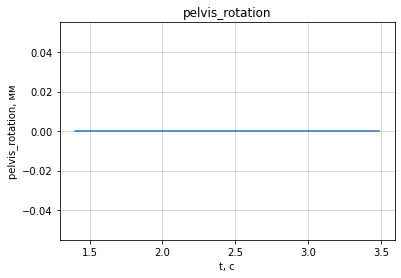

0.0


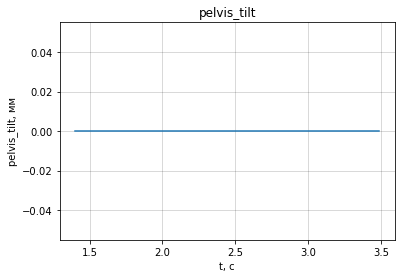

0.0


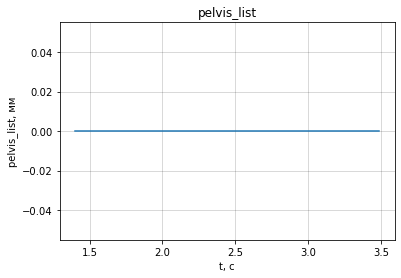

0.005168341678073877


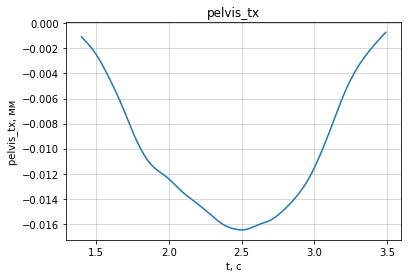

0.0015301798499347285


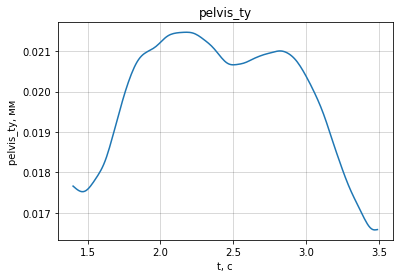

0.0004601162084379528


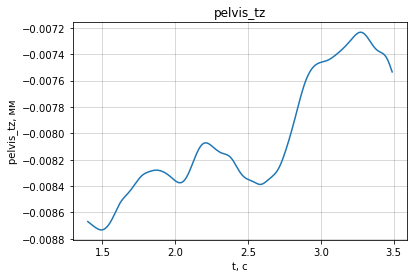

0.2038504352286891


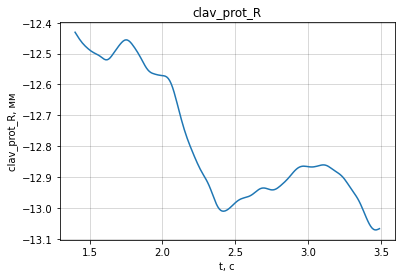

0.4551752842433766


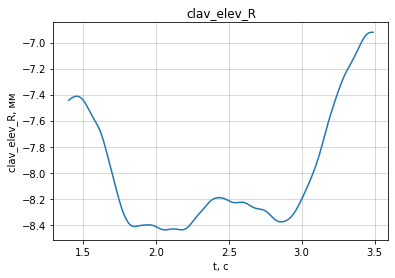

0.14595088849719062


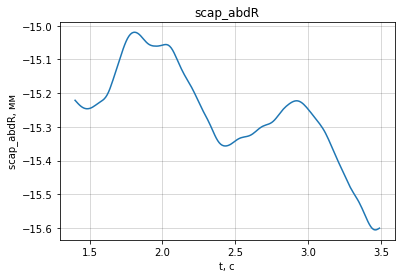

0.21337231268826612


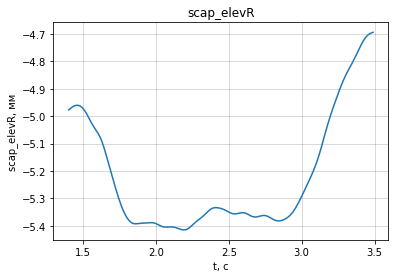

0.2575358287403457


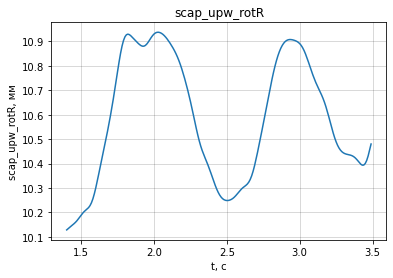

0.3717095937189445


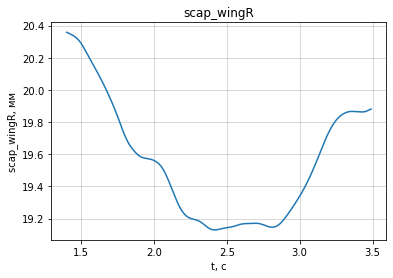

0.04270895550426684


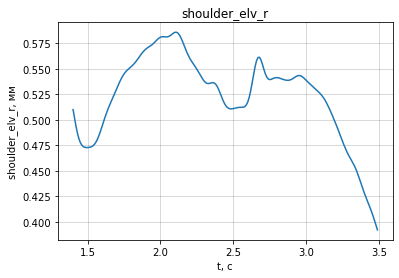

1.0101078147097153


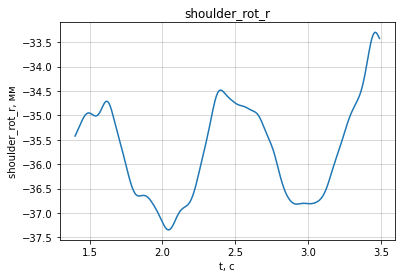

0.3054886369258152


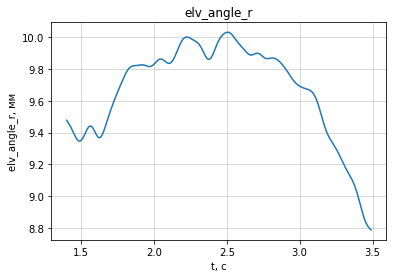

0.22500741481807154


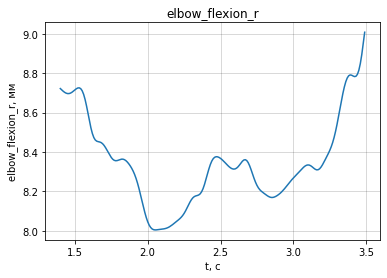

1.2241654938175575


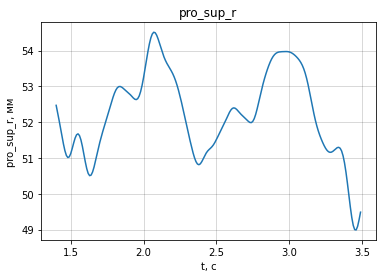

0.0009508038110066498


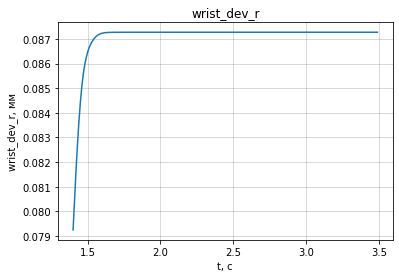

0.0


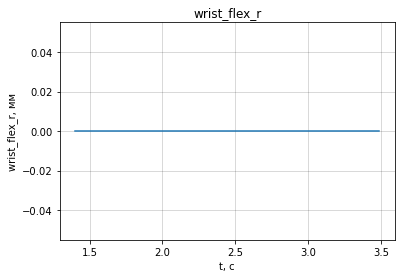

0.2722427978108662


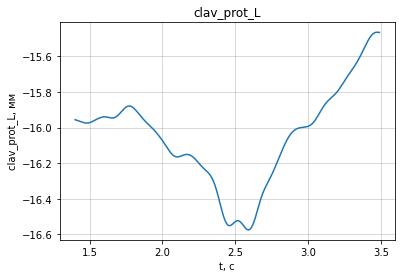

0.350075724420608


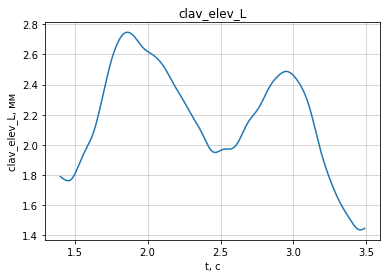

0.34614498467377125


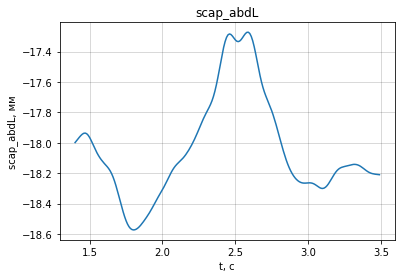

0.190759145004563


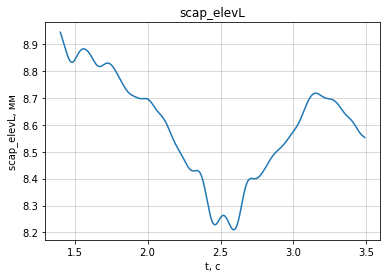

0.47014336949019847


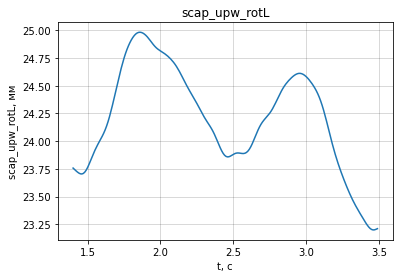

0.08975672276357771


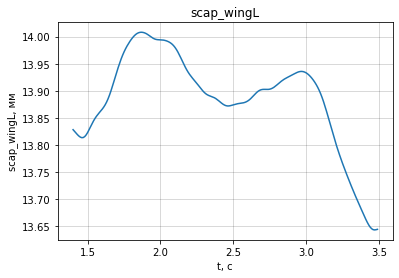

0.6598274882436436


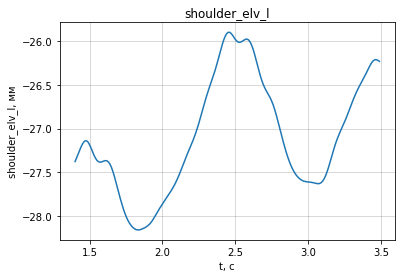

0.06514345183480322


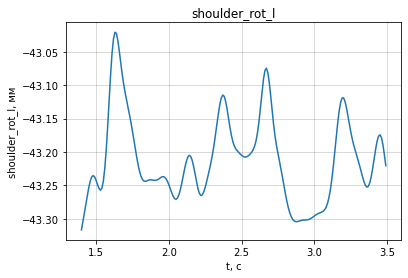

0.5852939230089705


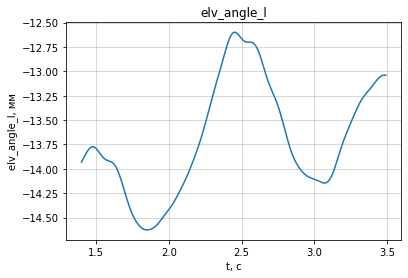

0.3978983116287192


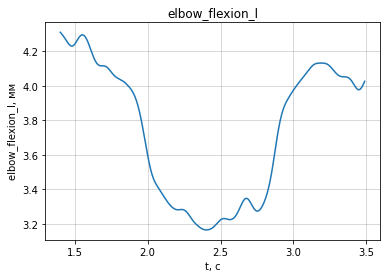

0.20564183616429382


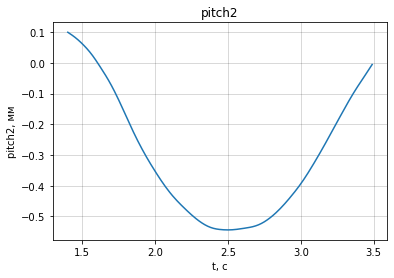

0.003944371866271632


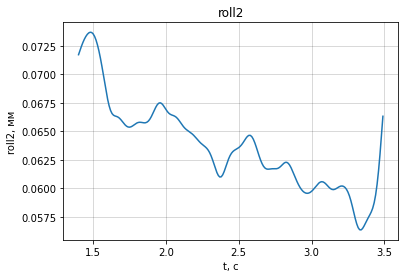

0.011761404356052796


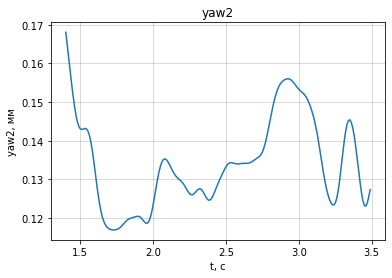

2.2033124973703657


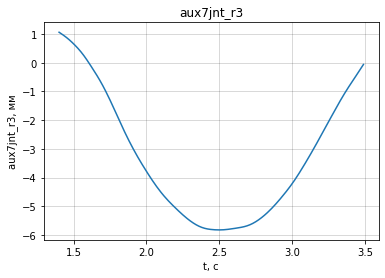

0.03096140327945192


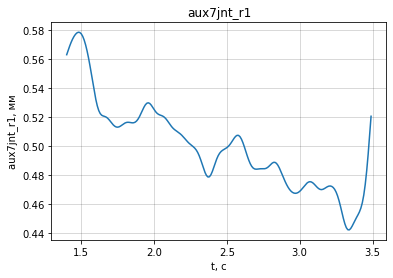

0.1266892047596201


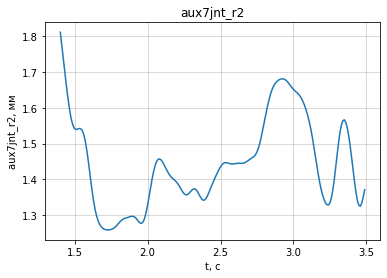

2.5921259962568404


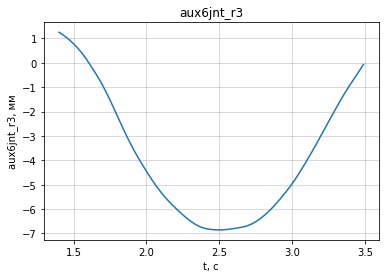

0.03548137245628095


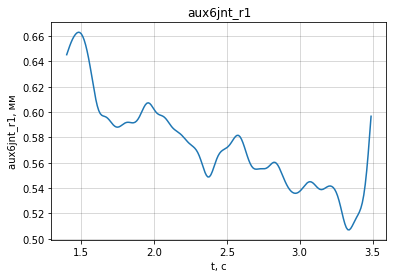

0.14757935941484718


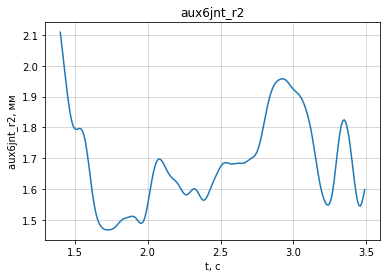

2.5921259962568404


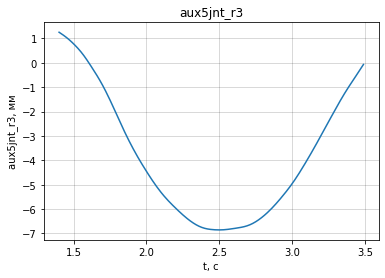

0.048815066227262435


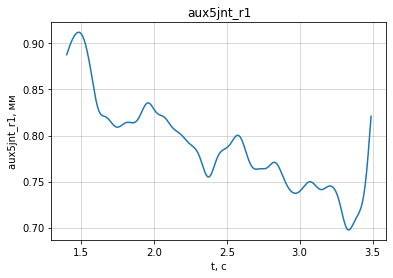

0.14757935941484718


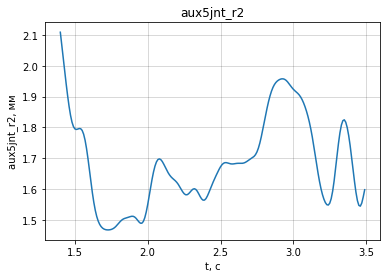

1.9440944974807408


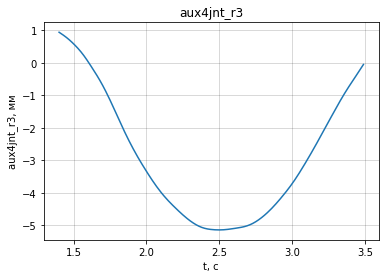

0.048815066227262435


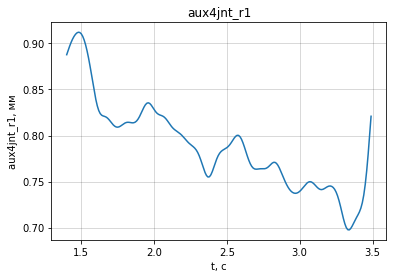

0.14757935941484718


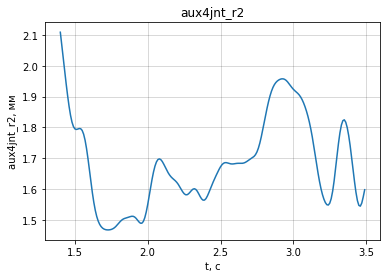

1.2960629979539324


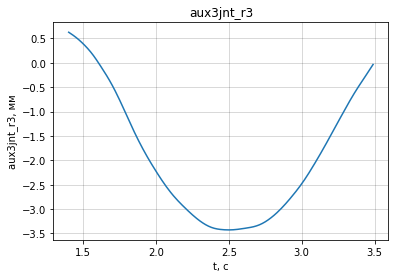

0.04429522741967322


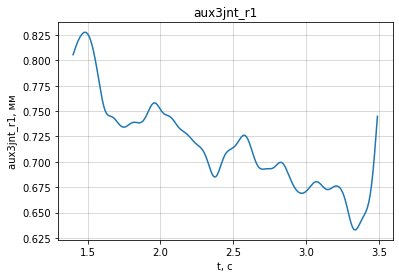

0.06334460275719471


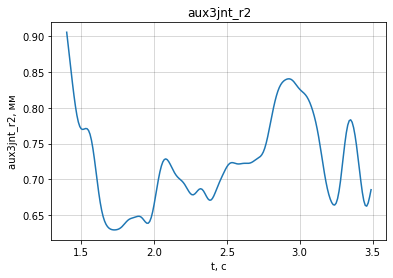

0.07580641978661992


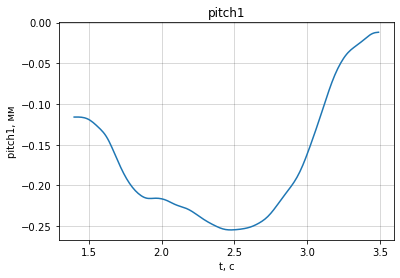

0.004816728024157291


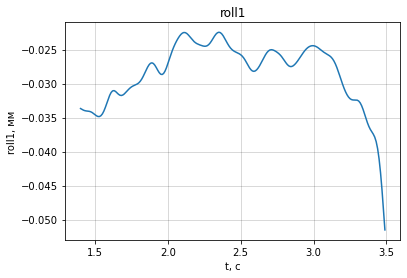

0.01267861307347648


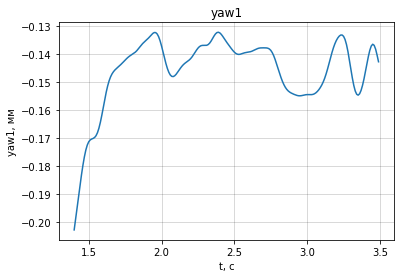

2.414922486362772


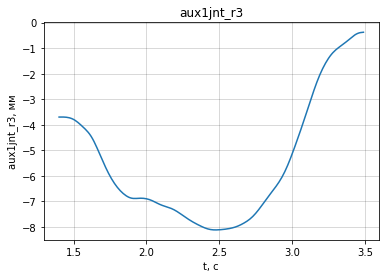

0.1379891008280157


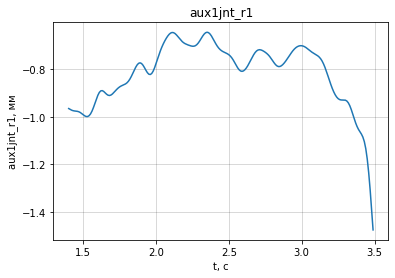

0.08063399455219937


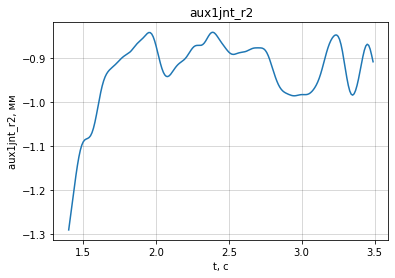

In [23]:
#Вывод сглаженных графиков
for i in useful_coords: 
    fig, ax = plt.subplots()
    ax.grid(color='#000000', alpha=0.15, linestyle='-', linewidth=1, which='major')
    ax.grid(color='#000000', alpha=0.1, linestyle='-', linewidth=0.5, which='minor')
    plt.title(i)
    ax.set_xlabel('t, с')
    ax.set_ylabel(i + ', мм')
    ax.plot(df['Time'], df2[i])
    print(df2[i].std())
    #ax.plot(df['Time'], df[i])
    plt.show()

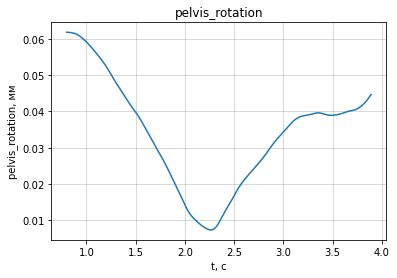

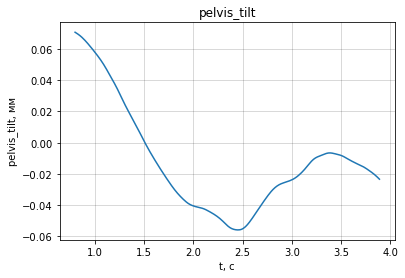

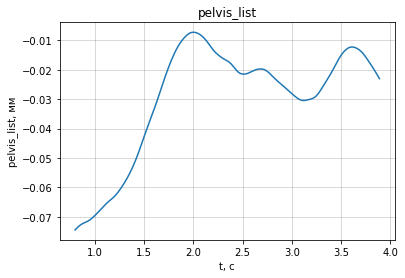

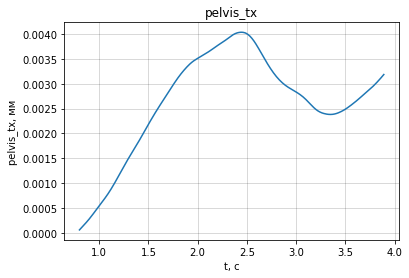

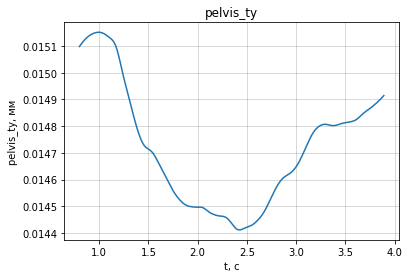

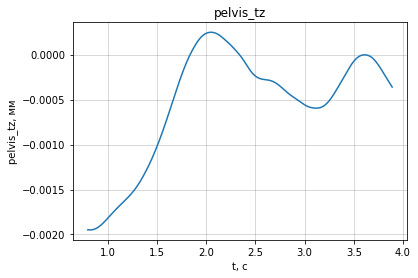

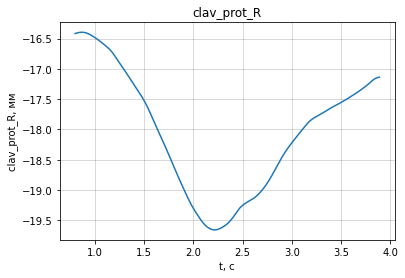

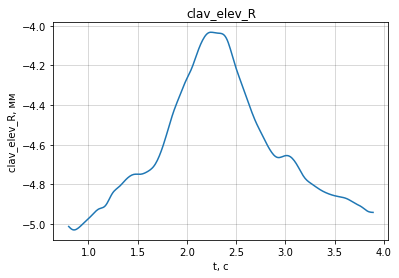

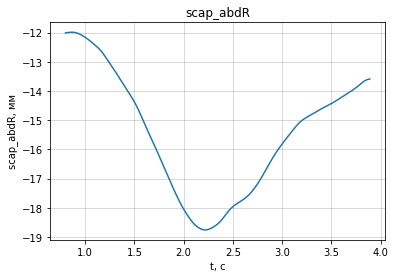

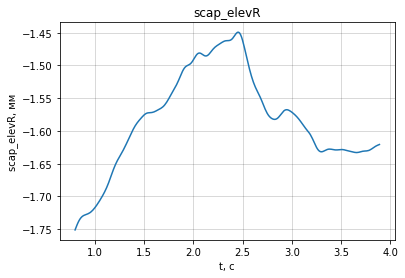

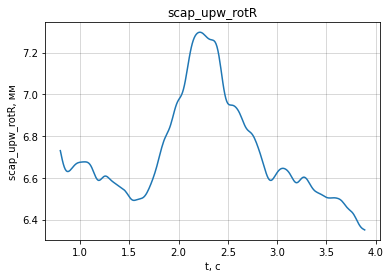

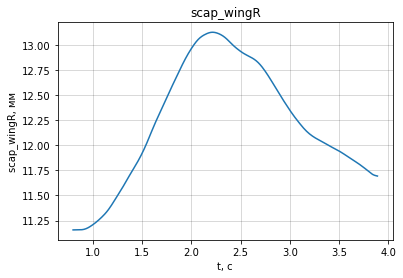

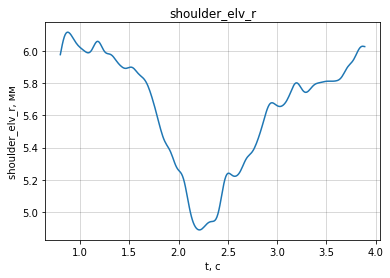

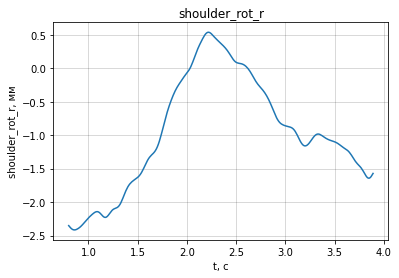

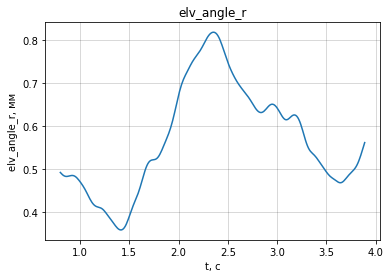

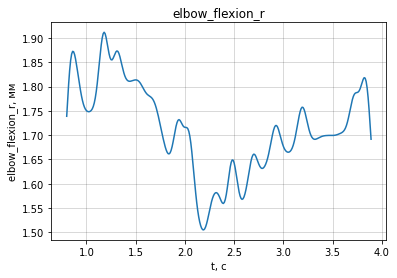

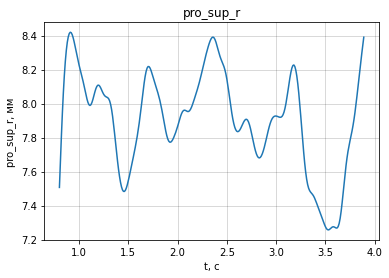

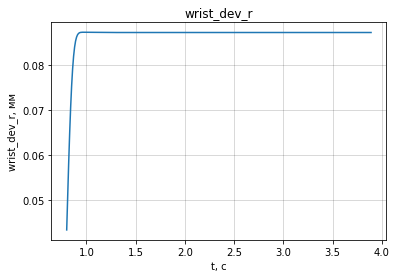

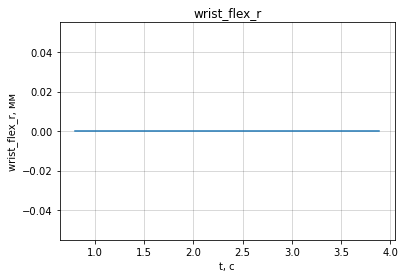

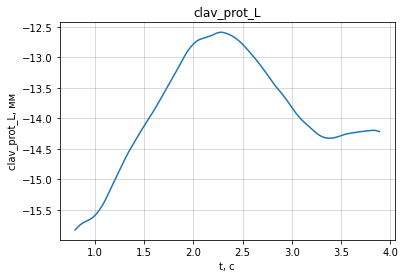

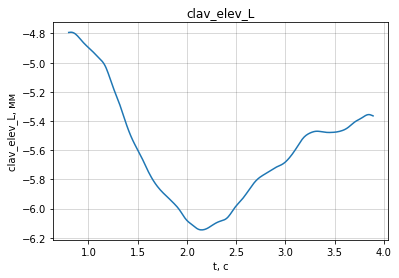

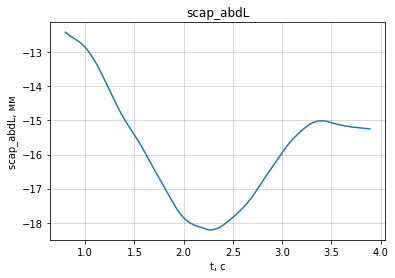

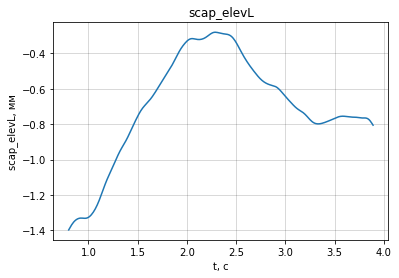

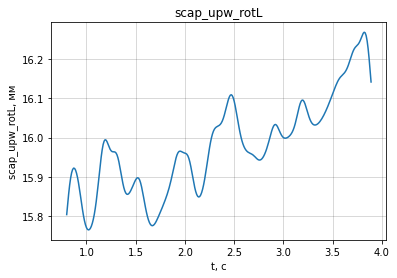

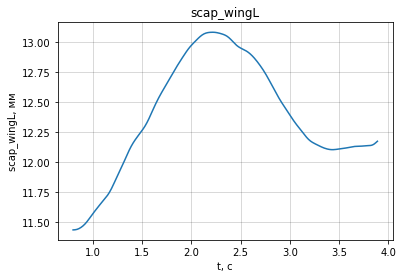

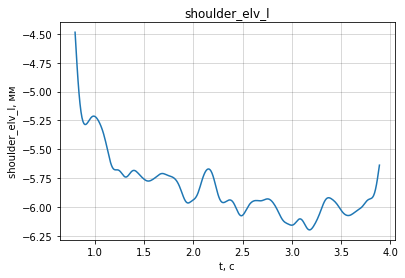

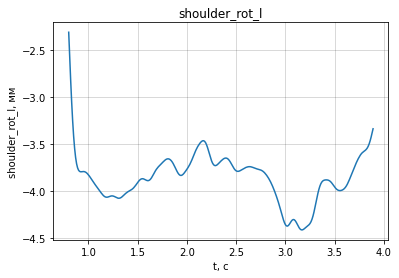

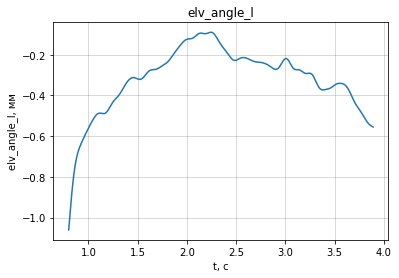

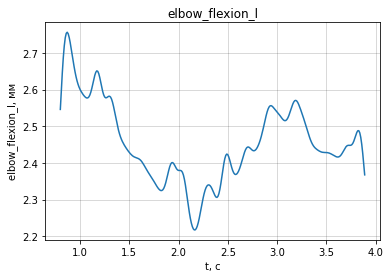

In [38]:
#Вывод несглаженных графиков
for i in useful_coords: 
    fig, ax = plt.subplots()
    ax.grid(color='#000000', alpha=0.15, linestyle='-', linewidth=1, which='major')
    ax.grid(color='#000000', alpha=0.1, linestyle='-', linewidth=0.5, which='minor')
    plt.title(i)
    ax.set_xlabel('t, с')
    ax.set_ylabel(i + ', мм')
    ax.plot(df1['Time'], df1[i])
    #ax.plot(df['Time'], df[i])
    plt.show()